Import Libraries

In [38]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("ML Libraries loaded.")

ML Libraries loaded.


Load Cleaned Data

In [39]:
# 1. Load Data
df_clean = pd.read_csv('cleaned_fertilizer_data.csv')

# 2. Separate Features (X) and Target (y)
# The target is the 'Fertilizer_Name' column
X = df_clean.drop('Fertilizer_Name', axis=1)
y = df_clean['Fertilizer_Name']

print("Data Loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"Target Labels (y) shape: {y.shape}")
print(f"Unique Fertilizers: {y.nunique()}")

Data Loaded.
Features (X) shape: (8000, 8)
Target Labels (y) shape: (8000,)
Unique Fertilizers: 7


Build Preprocessing Pipeline

In [40]:
# 1. Define Column Types
# Adjust these names if your CSV columns are slightly different
numerical_features = ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
categorical_features = ['Soil_Type', 'Crop_Type']

# 2. Create Transformer
# - Numerical -> Standard Scaler (Normalizes values)
# - Categorical -> OneHotEncoder (Converts 'Sandy' to vector [1, 0, 0...])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("Preprocessing pipeline defined.")

Preprocessing pipeline defined.


Training the Model

In [41]:
# 1. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'))
])

# 3. Train
print("🚀 Training Fertilizer Recommendation Model...")
model_pipeline.fit(X_train, y_train)
print("✅ Training Complete!")

🚀 Training Fertilizer Recommendation Model...
✅ Training Complete!


Evaluation (The Report Card)

In [42]:
# Predict on Test Set
y_pred = model_pipeline.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

🎯 Model Accuracy: 15.31%

--- Classification Report ---
              precision    recall  f1-score   support

    10-26-26       0.16      0.16      0.16       241
    14-35-14       0.14      0.14      0.14       241
    17-17-17       0.10      0.12      0.11       215
       20-20       0.17      0.15      0.16       236
       28-28       0.15      0.15      0.15       219
         DAP       0.16      0.15      0.16       239
        Urea       0.19      0.22      0.20       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600



Confusion Matrix Heatmap

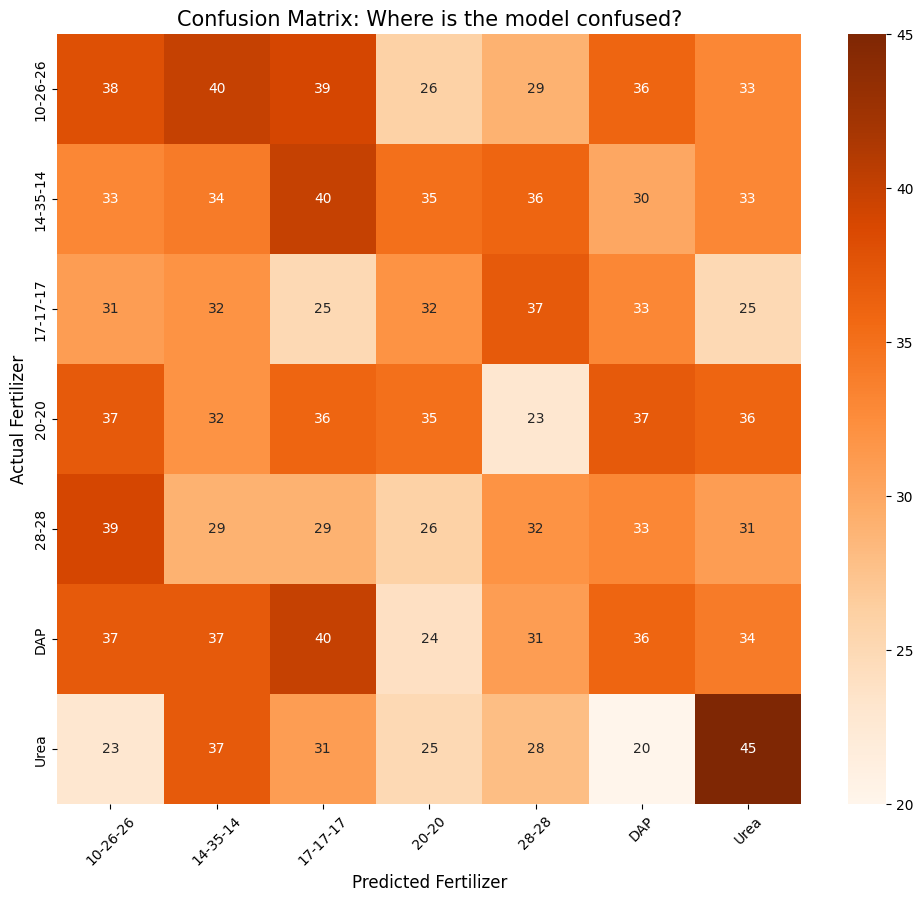

In [43]:
plt.figure(figsize=(12, 10))

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=model_pipeline.classes_, 
            yticklabels=model_pipeline.classes_)

plt.xlabel('Predicted Fertilizer', fontsize=12)
plt.ylabel('Actual Fertilizer', fontsize=12)
plt.title('Confusion Matrix: Where is the model confused?', fontsize=15)
plt.xticks(rotation=45)
plt.show()

Save the Model

In [44]:
model_filename = 'fertilizer_recommendation_model.pkl'
joblib.dump(model_pipeline, model_filename)

print(f"✅ Model saved as '{model_filename}'")

✅ Model saved as 'fertilizer_recommendation_model.pkl'
